## <center> STOCK PRIDICTIONS </center>
### <center> USING LTSM </center>

Importing the Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

Loading the dataset

In [2]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-16,15.299333,15.400000,15.100000,15.222000,15.222000,112249500
1,2019-05-17,14.797333,14.816000,13.928000,14.068667,14.068667,266800500
2,2019-05-20,13.520000,13.733333,13.016667,13.690667,13.690667,307893000
3,2019-05-21,13.184000,13.826667,13.069333,13.672000,13.672000,270058500
4,2019-05-22,13.273333,13.596000,12.785333,12.848667,12.848667,280278000


Applying Some basic functions to know the structure of Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Converting the Datatype of Date Column from object to Datetime And making it index

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

Using the Close Column for Predictions

In [6]:
data = df[['Close']]

Now its time to scale the data

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

Splitting the data into Training and Testing Data

In [23]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

Creating Sequences for LSTM Model

In [24]:
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 60
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

Reshaping the data according to the LSTM model input requirements

In [25]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

Lets see which shape we got after reshaping

In [11]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (948, 60, 1)
x_test shape: (192, 60, 1)


Now Its the time to build the LTSM model

In [27]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


Training

In [28]:
model.fit(x_train, y_train, batch_size=1, epochs=30)

Epoch 1/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 72s 61ms/step - loss: 0.0177
Epoch 2/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 52s 54ms/step - loss: 0.0048
Epoch 3/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - loss: 0.0045
Epoch 4/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - loss: 0.0039
Epoch 5/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - loss: 0.0038
Epoch 6/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - loss: 0.0026
Epoch 7/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - loss: 0.0032
Epoch 8/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - loss: 0.0027
Epoch 9/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 57s 60ms/step - loss: 0.0029
Epoch 10/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 61s 64ms/step - loss: 0.0027
Epoch 11/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - loss: 0.0023
Epoch 12/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - loss: 0.0022
Epoch 13/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - loss: 0.0027
Epoch 14/30
948/948 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - loss: 0.0019
Epoch 15/30
948/948 ━━━━━━━━━

Making predictions on test data

In [30]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


In [35]:
train = data[:train_size]
valid = data[train_size+seq_length:]
valid = data[train_size + seq_length:].copy()
valid.loc[:, 'Predictions'] = predictions

Plotting the results

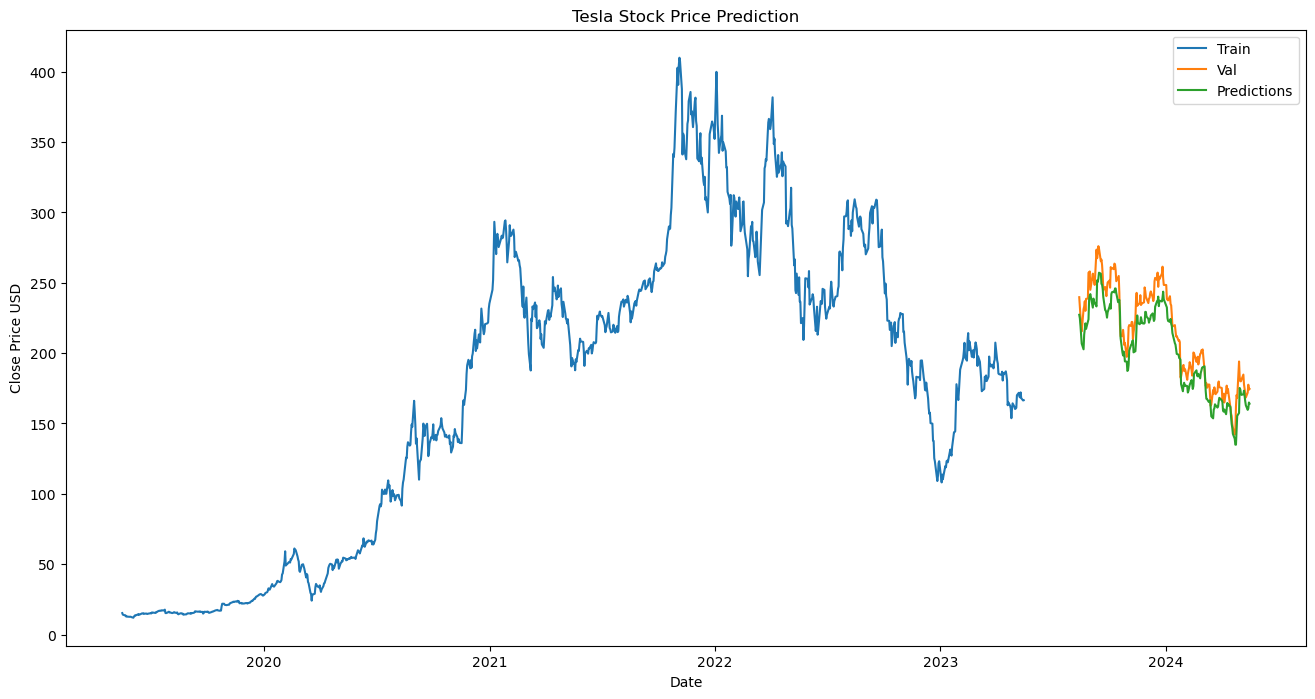

In [37]:
plt.figure(figsize=(16,8))
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Val')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()